## setup

In [89]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import os
import sys
currDir = os.path.dirname(os.path.realpath("__file__"))
rootDir = os.path.abspath(os.path.join(currDir, '..'))
sys.path.insert(1, rootDir)

In [91]:
import shap
import numpy as np
from src.utils.file_utils import load_df, load_model
shap.initjs()

In [92]:
df_trained_normed = load_df("norm_test2.csv")
print(df_trained_normed.head(2))
model = load_model("model2.h5")

      mode    speed        fe        tt  consumption
0  0.87831  1.83647 -0.051932 -1.003290     0.128040
1  0.87831  1.83647 -0.051932  0.024104    -0.311487
Model successfully loaded | file_location: C:\Users\archg\school\senoir\xai-senior-design\models\model2.h5


## evaluation of xai method

**helpful resources**:
- [shap docs](https://shap.readthedocs.io/en/latest/)
- [article 1](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)
- [article 2](https://www.elasticfeed.com/74a666af63104f5b35cf8467e1617c32/)

In [93]:
sampled_df = df_trained_normed.sample(n=100000)

In [94]:
df_train_normed_summary = shap.kmeans(df_trained_normed.values, 25)
explainer = shap.KernelExplainer(model.predict, df_train_normed_summary)
shap_values = explainer.shap_values(sampled_df)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


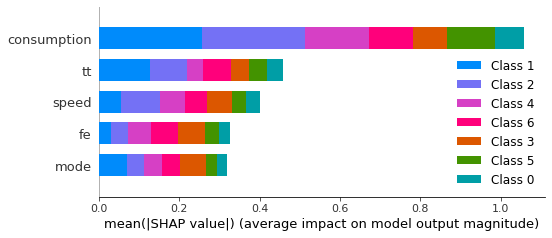

In [95]:
# Summarize the Shapley values in a plot
shap.summary_plot(shap_values, sampled_df)

In [96]:
print(len(shap_values[0]))
print(len(df_trained_normed))

100000
403200


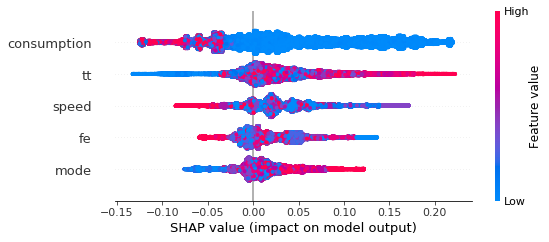

In [98]:
shap.summary_plot(shap_values[0], sampled_df)

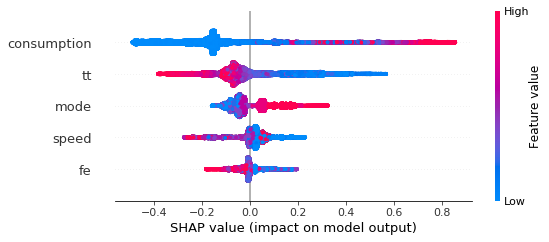

In [99]:
shap.summary_plot(shap_values[1], sampled_df)

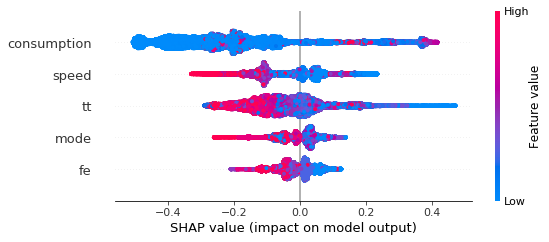

In [100]:
shap.summary_plot(shap_values[2], sampled_df)

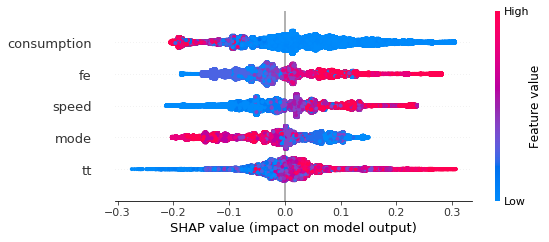

In [101]:
shap.summary_plot(shap_values[3], sampled_df)

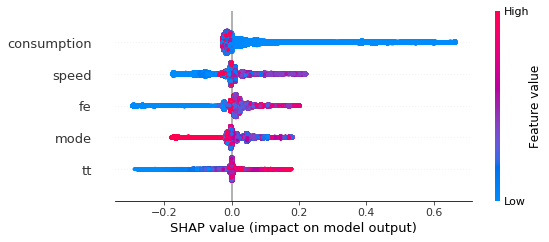

In [102]:
shap.summary_plot(shap_values[4], sampled_df)

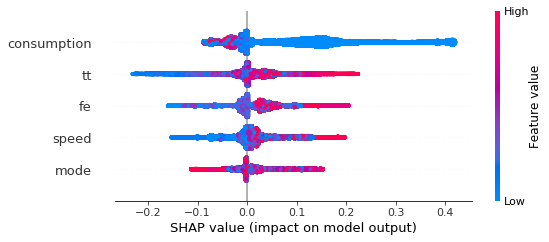

In [103]:
shap.summary_plot(shap_values[5], sampled_df)

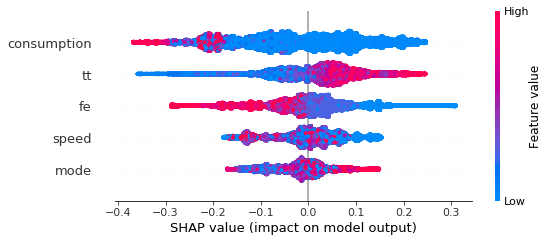

In [104]:
shap.summary_plot(shap_values[6], sampled_df)

In [130]:
#Graph how each feature for the 9th observation contributed to the probabilty of it being of class 0
shap.force_plot(explainer.expected_value[0], shap_values[0][9])

In [142]:
#Graph to force plot for the probabilty of being class 0 for the first 10,000 observations (bc of space reasons)
shap.force_plot(explainer.expected_value[0], shap_values[0][0:10000], sampled_df)

In [144]:
print(type(explainer.expected_value))
print(type(shap_values[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [145]:
#Save explainer and shap values to file

CURR_DIR = os.path.dirname(os.path.realpath("__file__"))
ROOT_DIR = os.path.abspath(os.path.join(CURR_DIR, ".."))

shap_dir = data_dir = os.path.join(ROOT_DIR, "shap")

np.save(os.path.join(shap_dir, "explainer_set_2_100000"), explainer.expected_value)
for i in range(7):
    np.save(os.path.join(shap_dir, "shap_vals_set_2_100000_class_" + str(i)), shap_values[i])



In [150]:
#Load explainer and shap values from file

loaded_explainer_expected_value = np.load(os.path.join(shap_dir, "explainer_set_2_100000.npy"))
loaded_shap_values = []
for i in range(7):
    loaded_shap_values.append(np.load(os.path.join(shap_dir, "shap_vals_set_2_100000_class_" + str(i) + ".npy")))


In [151]:
#Graph how each feature for the 9th observation contributed to the probabilty of it being of class 0
shap.force_plot(loaded_explainer_expected_value[0], loaded_shap_values[0][9])